In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
df=pd.read_csv("cust_satisfaction.csv")
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [32]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [35]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [36]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [37]:
balance_pf = pd.concat([loyal_customer, disloyal_customer], axis=0)
balance_pf.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
22368,Male,Loyal Customer,Business travel,Eco Plus,neutral or dissatisfied,43,588,2,3,2,4,0.0
7750,Female,Loyal Customer,Business travel,Business,satisfied,36,3414,4,4,5,0,0.0
97084,Male,Loyal Customer,Business travel,Business,satisfied,58,2102,5,5,3,0,0.0
25728,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied,62,204,4,3,4,8,0.0
42603,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied,44,859,2,4,2,50,34.0


In [38]:
cat_col = df.select_dtypes(include= "object")
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [44]:
num_col = df.select_dtypes(exclude= "object")
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,5,4,5,25,18.0
1,25,235,1,3,1,1,6.0
2,26,1142,5,4,5,0,0.0
3,25,562,2,3,2,11,9.0
4,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0.0
103900,49,2347,5,5,4,0,0.0
103901,30,1995,4,4,4,7,14.0
103902,22,1000,1,1,1,0,0.0


In [39]:
pd.get_dummies(cat_col,drop_first=True)

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,True,False,True,False,True,False
1,True,True,False,False,False,False
2,False,False,False,False,False,True
3,False,False,False,False,False,False
4,True,False,False,False,False,True
...,...,...,...,...,...,...
103899,False,True,False,True,False,False
103900,True,False,False,False,False,True
103901,True,True,False,False,False,False
103902,False,True,False,True,False,False


In [45]:
##encoding categorical data
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
ohe = OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(103594, 7))

In [46]:
column_name = list(ohe.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [47]:
one_hot = pd.DataFrame(cat_col_encoded, columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [48]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col],axis=1)
final_df.head()


,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,13,460,5,4,5,25,18.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,25,235,1,3,1,1,6.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26,1142,5,4,5,0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25,562,2,3,2,11,9.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,61,214,3,4,3,0,0.0


In [62]:
x = final_df.drop(["Customer Type_disloyal Customer"], axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [63]:
##split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)   

In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

e:\Python\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.score(x_train,y_train)

0.8935505279034691

In [66]:
model.score(x_test,y_test)

0.8974371349968627

In [67]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,Customer Type_disloyal Customer,prediction
18550,0.0,0.0
19287,0.0,0.0
72281,0.0,0.0
84957,0.0,0.0
87557,0.0,0.0
...,...,...
13466,0.0,1.0
59404,0.0,0.0
84713,0.0,0.0
43975,0.0,0.0


In [69]:
confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["prediction"])

array([[16198,   786],
       [ 1339,  2396]])

Text(0.5, 23.52222222222222, 'Predicted')

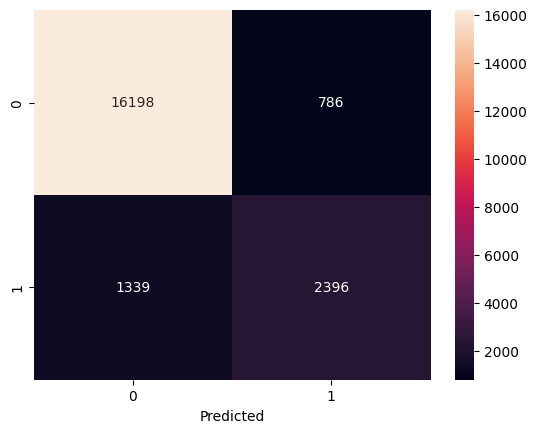

In [76]:
##graph
import seaborn as sns
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["prediction"]), annot=True, fmt="d")
plt.xlabel("Predicted")

In [75]:
print(classification_report(y_test["Customer Type_disloyal Customer"],y_test["prediction"]))
from sklearn.metrics import accuracy_score
accuracy_score(y_test["Customer Type_disloyal Customer"],y_test["prediction"])


              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94     16984
         1.0       0.75      0.64      0.69      3735

    accuracy                           0.90     20719
   macro avg       0.84      0.80      0.82     20719
weighted avg       0.89      0.90      0.89     20719



0.8974371349968627

In [77]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,Customer Type_disloyal Customer,prediction
18550,0.0,0.0
19287,0.0,0.0
72281,0.0,0.0
84957,0.0,0.0
87557,0.0,0.0
...,...,...
13466,0.0,1.0
59404,0.0,0.0
84713,0.0,0.0
43975,0.0,0.0


In [85]:
##decison tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [1]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x,y)
tree.plot_tree(dtree)

NameError: name 'DecisionTreeClassifier' is not defined